# modele uczenia maszynowego

## PyTorch Regresja liniowa

LinearRegression(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=1, bias=True)
  )
)
liczba trenowalnych parametrów: 2
epoch: 050, loss = 0.85
epoch: 100, loss = 0.48
epoch: 150, loss = 0.28
epoch: 200, loss = 0.16
epoch: 250, loss = 0.09
epoch: 300, loss = 0.05
epoch: 350, loss = 0.03
epoch: 400, loss = 0.02
Parameter containing:
tensor([[1.9655]], requires_grad=True) Parameter containing:
tensor([-0.7603], requires_grad=True)


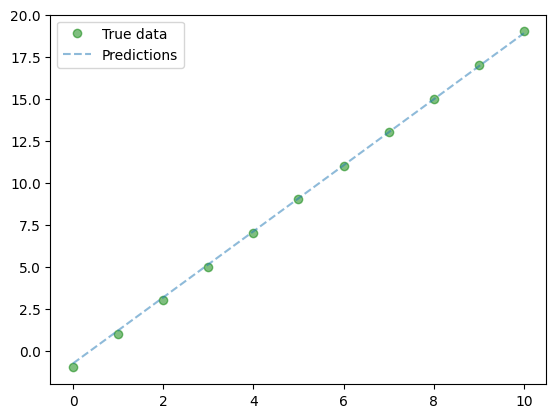

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression(torch.nn.Module):

    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(inputSize, outputSize)
        ) 
        
    def forward(self, x):
        return self.layers(x)

# zbior danych
x = range(11)
y = [2*xi - 1 for xi in x]

# dostosowanie do pytorch
x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.float32)

X_train = torch.from_numpy(x).view(-1,1)
y_train = torch.from_numpy(y).view(-1,1)

# obiekt liniowej regresji w wersji sieci nn
lr_model = LinearRegression(1,1)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(lr_model.parameters(), lr=0.01)


print(lr_model)
num_params = sum(p.numel() for p in lr_model.parameters() if p.requires_grad)
print(f"liczba trenowalnych parametrów: {num_params}")

epochs = 400
# petla uczaca 
for epoch in range(epochs):
    lr_model.train()

    y_pred = lr_model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print(f'epoch: {epoch+1:03d}, loss = {loss.item():.2f}')
 
    lr_model.eval()

# po treningu jeszcze raz generujemy predykcje
lr_model.eval()
with torch.no_grad():
    predicted = lr_model(X_train)

print(lr_model.layers[0].weight, lr_model.layers[0].bias)

plt.clf()
plt.plot(X_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(X_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

## PyTorch Regresja logistyczna

In [2]:
import torch
import numpy as np
from sklearn.datasets import make_classification

class LogisticRegression(torch.nn.Module):

    def __init__(self, inputSize, outputSize):
        super(LogisticRegression, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(inputSize, outputSize),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        logits = self.layers(x)
        return logits


# prepare dataset
X, y = make_classification(n_samples=10**4, n_features=10 ,random_state=42)

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)

model = LogisticRegression(X_train.shape[1], y_train.shape[1])

learningRate = 0.01
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

# petla uczaca 
num_epochs = 500

for epoch in range(num_epochs):
    # forward pass and loss
    model.train()
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    model.eval()

    if (epoch+1) % 50 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')



model.eval()
with torch.no_grad():
    y_predicted = model(X_train)  # no need to call model.forward()
    y_predicted_cls = y_predicted.round()   # round off to nearest class
    acc = y_predicted_cls.eq(y_train).sum() / float(y_train.shape[0])  # accuracy
    print(f'accuracy = {acc:.4f}')
    print(f"predykcja dla wiersza 0:{y_predicted[0]}, wartosc prawdziwa: {y_train[0]}")

epoch: 50, loss = 0.5996
epoch: 100, loss = 0.5019
epoch: 150, loss = 0.4471
epoch: 200, loss = 0.4128
epoch: 250, loss = 0.3894
epoch: 300, loss = 0.3726
epoch: 350, loss = 0.3599
epoch: 400, loss = 0.3500
epoch: 450, loss = 0.3422
epoch: 500, loss = 0.3357
accuracy = 0.8820
predykcja dla wiersza 0:tensor([0.8049]), wartosc prawdziwa: tensor([1.])
